In [11]:
from os.path import join, dirname, split
import inspect

from transformers import AutoProcessor, AutoModelForCTC
from transformers.models.wav2vec2.modeling_wav2vec2 import Wav2Vec2Model, Wav2Vec2ForCTC
from transformers import Wav2Vec2Model, Wav2Vec2Config
import torch.nn as nn
import torchaudio

ROOT_DIR = split(dirname("/workspace/NN/notebooks/test.ipynb"))[0]
print(ROOT_DIR)

/workspace/NN


In [12]:
configuration = Wav2Vec2Config()

processor = AutoProcessor.from_pretrained(
    "Eyvaz/wav2vec2-base-russian-demo-kaggle",
    cache_dir=join(ROOT_DIR, "weights", "loaded_weights", ),
)
model: Wav2Vec2ForCTC = AutoModelForCTC.from_pretrained(
    "Eyvaz/wav2vec2-base-russian-demo-kaggle",
    cache_dir=join(ROOT_DIR, "weights", "loaded_weights", ),
)

bundle = torchaudio.pipelines.WAV2VEC2_BASE
old_feature_extractor = bundle.get_model(
    dl_kwargs={
        "file_name": join(ROOT_DIR, "weights", "loaded_weights", "wav2vec2_fairseq_base_ls960.pth")
    }
)


Some weights of the model checkpoint at Eyvaz/wav2vec2-base-russian-demo-kaggle were not used when initializing Wav2Vec2ForCTC: ['wav2vec2.encoder.pos_conv_embed.conv.weight_g', 'wav2vec2.encoder.pos_conv_embed.conv.weight_v', 'wav2vec2.masked_spec_embed']
- This IS expected if you are initializing Wav2Vec2ForCTC from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing Wav2Vec2ForCTC from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at Eyvaz/wav2vec2-base-russian-demo-kaggle and are newly initialized: ['wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'wav2vec2.encoder.pos_conv_embed.conv.parametrizations.we

In [13]:
model.wav2vec2

Wav2Vec2Model(
  (feature_extractor): Wav2Vec2FeatureEncoder(
    (conv_layers): ModuleList(
      (0): Wav2Vec2GroupNormConvLayer(
        (conv): Conv1d(1, 512, kernel_size=(10,), stride=(5,), bias=False)
        (activation): GELUActivation()
        (layer_norm): GroupNorm(512, 512, eps=1e-05, affine=True)
      )
      (1-4): 4 x Wav2Vec2NoLayerNormConvLayer(
        (conv): Conv1d(512, 512, kernel_size=(3,), stride=(2,), bias=False)
        (activation): GELUActivation()
      )
      (5-6): 2 x Wav2Vec2NoLayerNormConvLayer(
        (conv): Conv1d(512, 512, kernel_size=(2,), stride=(2,), bias=False)
        (activation): GELUActivation()
      )
    )
  )
  (feature_projection): Wav2Vec2FeatureProjection(
    (layer_norm): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
    (projection): Linear(in_features=512, out_features=768, bias=True)
    (dropout): Dropout(p=0.0, inplace=False)
  )
  (encoder): Wav2Vec2Encoder(
    (pos_conv_embed): Wav2Vec2PositionalConvEmbedding(
  

In [14]:
feature_extractor = nn.Sequential(
    model.wav2vec2.feature_extractor,
    model.wav2vec2.feature_projection,
)

for param in feature_extractor.parameters():
    param.requires_grad = False

feature_extractor

Sequential(
  (0): Wav2Vec2FeatureEncoder(
    (conv_layers): ModuleList(
      (0): Wav2Vec2GroupNormConvLayer(
        (conv): Conv1d(1, 512, kernel_size=(10,), stride=(5,), bias=False)
        (activation): GELUActivation()
        (layer_norm): GroupNorm(512, 512, eps=1e-05, affine=True)
      )
      (1-4): 4 x Wav2Vec2NoLayerNormConvLayer(
        (conv): Conv1d(512, 512, kernel_size=(3,), stride=(2,), bias=False)
        (activation): GELUActivation()
      )
      (5-6): 2 x Wav2Vec2NoLayerNormConvLayer(
        (conv): Conv1d(512, 512, kernel_size=(2,), stride=(2,), bias=False)
        (activation): GELUActivation()
      )
    )
  )
  (1): Wav2Vec2FeatureProjection(
    (layer_norm): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
    (projection): Linear(in_features=512, out_features=768, bias=True)
    (dropout): Dropout(p=0.0, inplace=False)
  )
)

In [15]:
old_feature_extractor

Wav2Vec2Model(
  (feature_extractor): FeatureExtractor(
    (conv_layers): ModuleList(
      (0): ConvLayerBlock(
        (layer_norm): GroupNorm(512, 512, eps=1e-05, affine=True)
        (conv): Conv1d(1, 512, kernel_size=(10,), stride=(5,), bias=False)
      )
      (1-4): 4 x ConvLayerBlock(
        (conv): Conv1d(512, 512, kernel_size=(3,), stride=(2,), bias=False)
      )
      (5-6): 2 x ConvLayerBlock(
        (conv): Conv1d(512, 512, kernel_size=(2,), stride=(2,), bias=False)
      )
    )
  )
  (encoder): Encoder(
    (feature_projection): FeatureProjection(
      (layer_norm): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
      (projection): Linear(in_features=512, out_features=768, bias=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (pos_conv_embed): ConvolutionalPositionalEmbedding(
        (conv): ParametrizedConv1d(
          768, 768, kernel_size=(128,), stride=(1,), padding=(64,), groups=16
          (parametriza

In [16]:
from torch.nn.parameter import Parameter
from collections import OrderedDict
import torch.nn as nn

layers = nn.Sequential(
    OrderedDict([
        ("1d_conv", nn.Conv2d(99, 16, 1)),
        ("bath_after_1d_conv", nn.BatchNorm2d(16)),
        ("relu_after_1d_conv", nn.ReLU(inplace=True)),
    ]))
param_groups = [{'params': list((list(layers[0].parameters())[0])), 'lr': 1e-5}]

param_groups

[{'params': [tensor([[[ 0.0186]],
   
           [[ 0.0275]],
   
           [[ 0.0210]],
   
           [[-0.0274]],
   
           [[ 0.0294]],
   
           [[ 0.0002]],
   
           [[-0.0249]],
   
           [[ 0.0833]],
   
           [[-0.0276]],
   
           [[ 0.0832]],
   
           [[-0.0735]],
   
           [[ 0.0363]],
   
           [[ 0.0372]],
   
           [[-0.0963]],
   
           [[-0.0229]],
   
           [[-0.0590]],
   
           [[-0.0054]],
   
           [[-0.0060]],
   
           [[ 0.0035]],
   
           [[ 0.0266]],
   
           [[ 0.0463]],
   
           [[ 0.0796]],
   
           [[-0.0851]],
   
           [[ 0.0252]],
   
           [[-0.0421]],
   
           [[-0.0937]],
   
           [[ 0.0531]],
   
           [[ 0.0780]],
   
           [[ 0.0276]],
   
           [[-0.0580]],
   
           [[ 0.0128]],
   
           [[-0.0091]],
   
           [[-0.0173]],
   
           [[ 0.0852]],
   
           [[-0.0125]],
   
          

In [1]:
import sys
import os
from os.path import join, dirname, split
import inspect

from transformers import AutoProcessor, AutoModelForCTC
from transformers.models.wav2vec2.modeling_wav2vec2 import Wav2Vec2Model, Wav2Vec2ForCTC
from transformers import Wav2Vec2Model, Wav2Vec2Config
import torch.nn as nn
import torchaudio

sys.path += ["/workspace/NN"]
os.chdir("/workspace/NN/src")
from src.data_controller.load_data import load_data
from src.data_controller.emotion_dataset import EmotionSpectrogramDataset


ROOT_DIR = split(dirname("/workspace/NN/notebooks/test.ipynb"))[0]
print(ROOT_DIR)

model: Wav2Vec2ForCTC = AutoModelForCTC.from_pretrained(
    "Eyvaz/wav2vec2-base-russian-demo-kaggle",
    cache_dir=join(ROOT_DIR, "weights", "loaded_weights", ),
)
for param in model.parameters():
    param.requires_grad = False


train_dataloader, val_dataloader, dataset = load_data(
    bath_size=16,
    num_workers=1,
    dataset_class=EmotionSpectrogramDataset,
)
inputs = next(iter(train_dataloader))
features = inputs['array'].to("cuda:0")

# model.wav2vec2.to("cuda:0")
# 
# features = model.wav2vec2(inputs['array'].cuda())


/workspace/NN
/workspace/NN


Some weights of the model checkpoint at Eyvaz/wav2vec2-base-russian-demo-kaggle were not used when initializing Wav2Vec2ForCTC: ['wav2vec2.encoder.pos_conv_embed.conv.weight_g', 'wav2vec2.encoder.pos_conv_embed.conv.weight_v', 'wav2vec2.masked_spec_embed']
- This IS expected if you are initializing Wav2Vec2ForCTC from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing Wav2Vec2ForCTC from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at Eyvaz/wav2vec2-base-russian-demo-kaggle and are newly initialized: ['wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'wav2vec2.encoder.pos_conv_embed.conv.parametrizations.we

In [10]:
testing_features = features.extract_features.cpu()
testing_features.size()

torch.Size([16, 249, 512])

In [4]:
from torchmetrics.classification import MulticlassConfusionMatrix
from torch import Tensor
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from torch.nn import Module

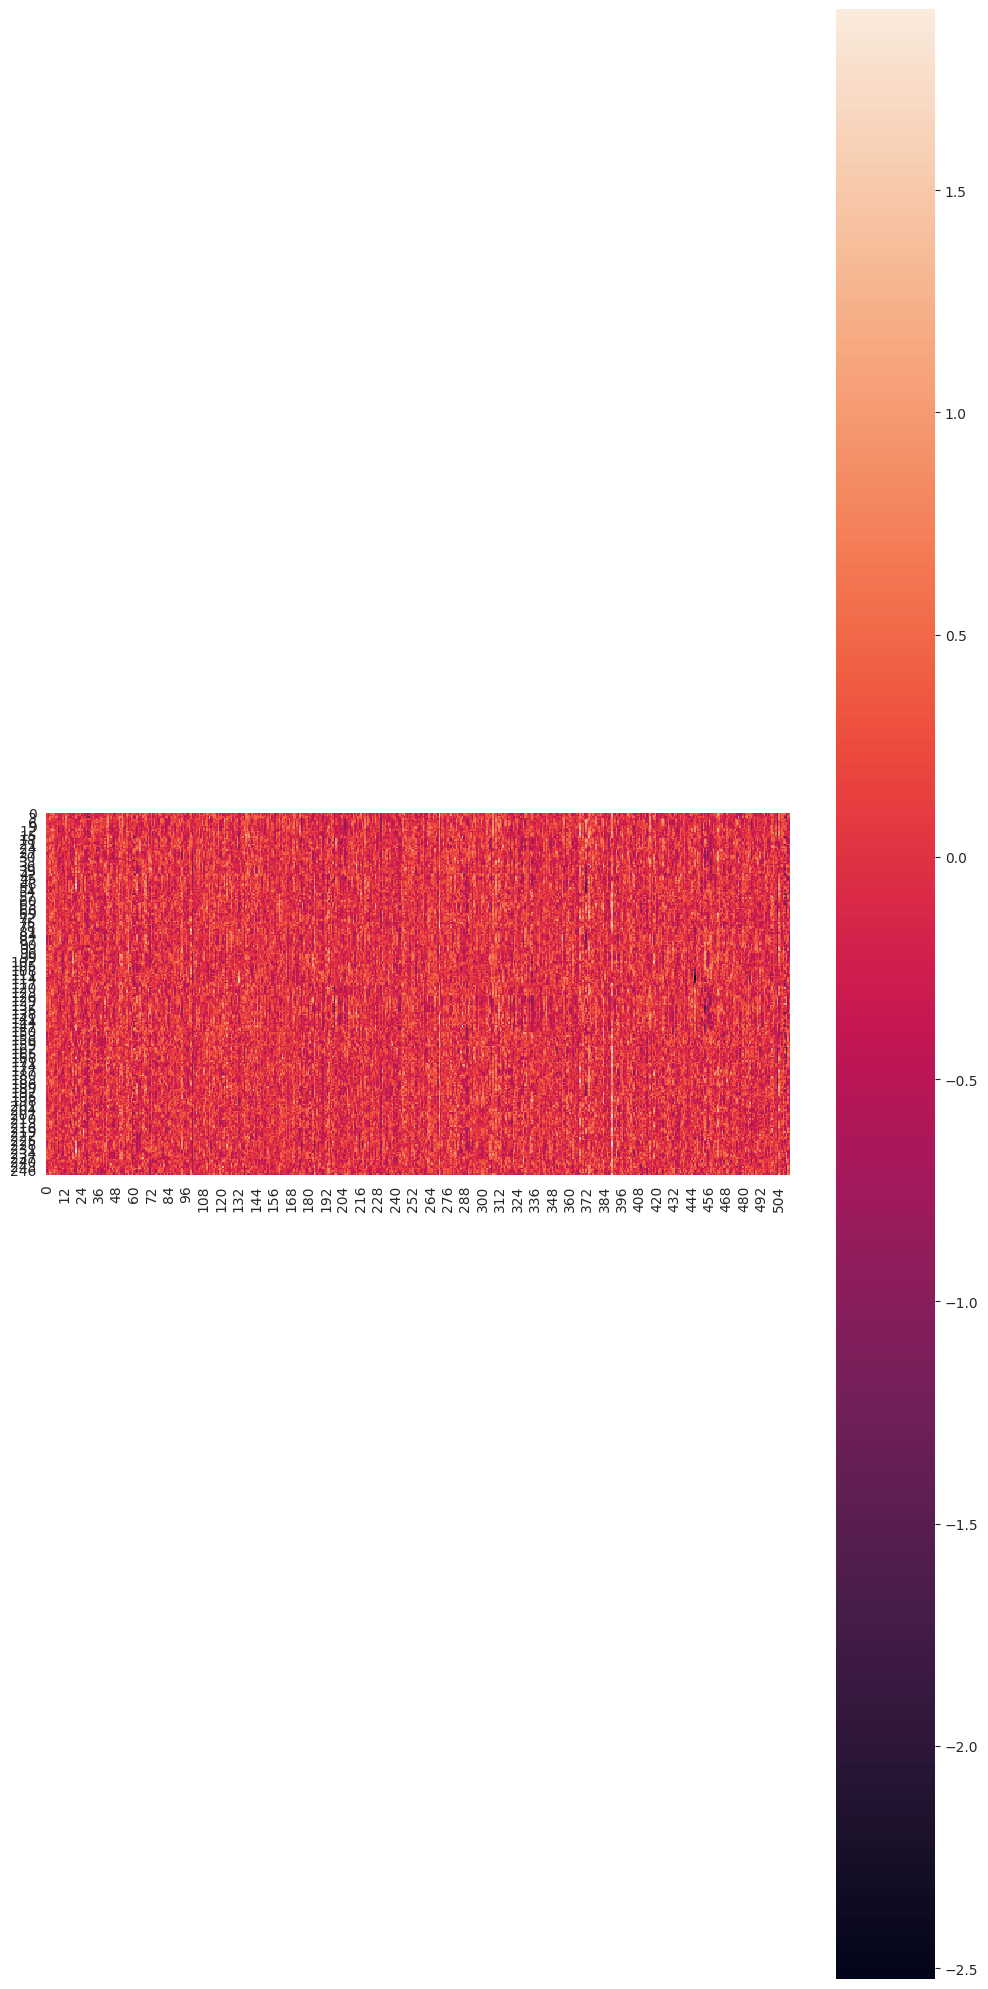

In [8]:
testing_features1 = testing_features[1]
df_cm = pd.DataFrame(testing_features1.numpy())

figsize = (10, 20)

fig, ax = plt.subplots(figsize=figsize)

hmap = sns.heatmap(
    df_cm, ax=ax, annot=False, square=True,
)
fig.tight_layout()

Wav2Vec2ForCTC(
  (wav2vec2): Wav2Vec2Model(
    (feature_extractor): Wav2Vec2FeatureEncoder(
      (conv_layers): ModuleList(
        (0): Wav2Vec2GroupNormConvLayer(
          (conv): Conv1d(1, 512, kernel_size=(10,), stride=(5,), bias=False)
          (activation): GELUActivation()
          (layer_norm): GroupNorm(512, 512, eps=1e-05, affine=True)
        )
        (1-4): 4 x Wav2Vec2NoLayerNormConvLayer(
          (conv): Conv1d(512, 512, kernel_size=(3,), stride=(2,), bias=False)
          (activation): GELUActivation()
        )
        (5-6): 2 x Wav2Vec2NoLayerNormConvLayer(
          (conv): Conv1d(512, 512, kernel_size=(2,), stride=(2,), bias=False)
          (activation): GELUActivation()
        )
      )
    )
    (feature_projection): Wav2Vec2FeatureProjection(
      (layer_norm): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
      (projection): Linear(in_features=512, out_features=768, bias=True)
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder)

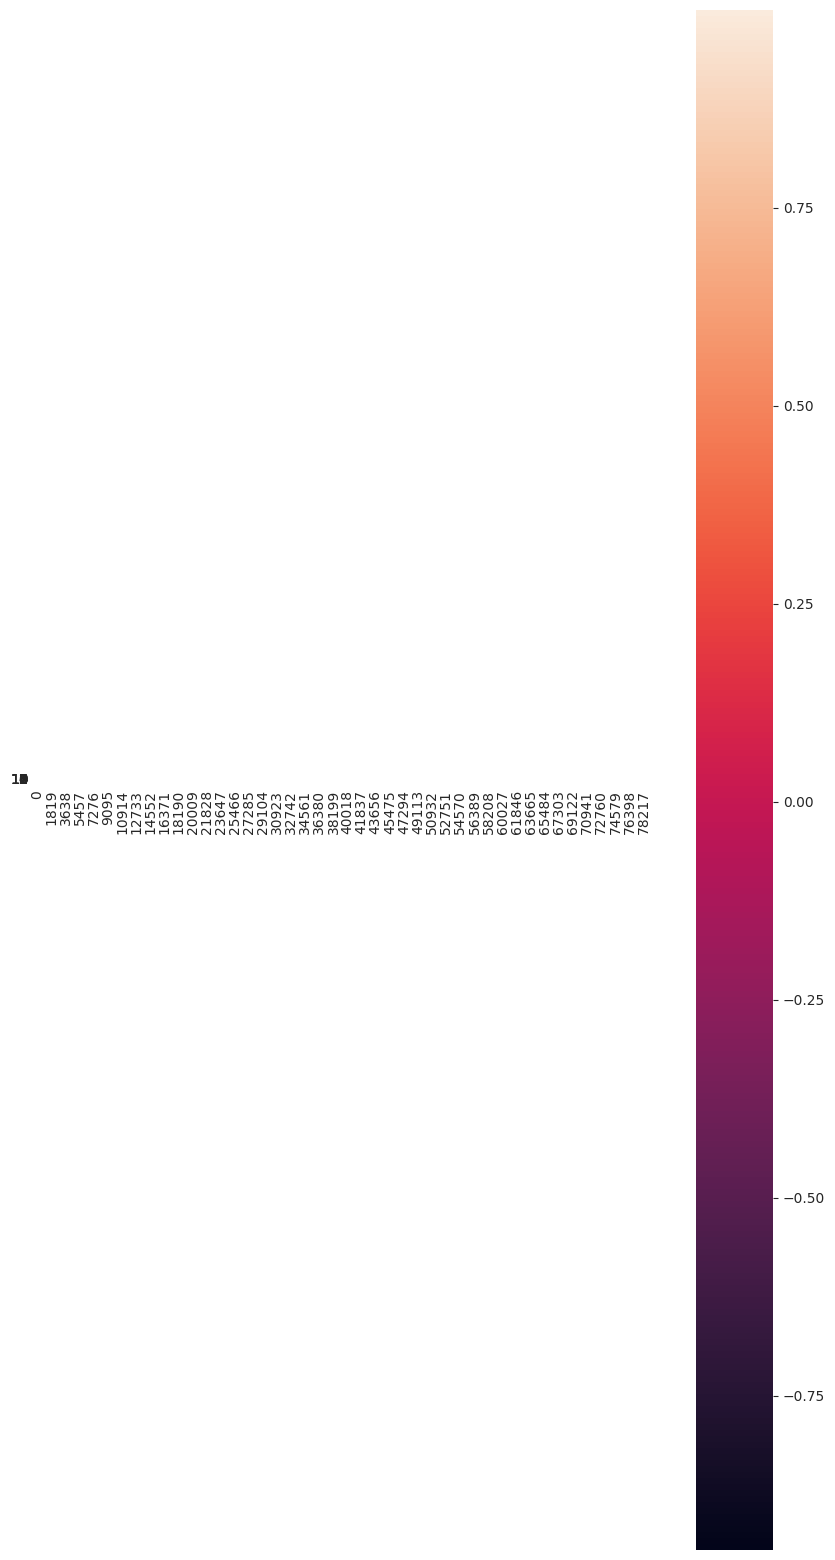

In [9]:

df_cm = pd.DataFrame(inputs['array'].numpy())
figsize = (10, 20)
fig, ax = plt.subplots(figsize=figsize)
hmap = sns.heatmap(
    df_cm, ax=ax, annot=False, square=True,
)
# fig.tight_layout()
inputs['array'].size()
model

In [2]:
import torchvision.models as models
import torch.nn as nn

efficientnet_model = models.efficientnet_b0(weights=False)
for params in efficientnet_model.parameters():
    params.requires_grad = False

efficientnet_model.features[0][0] = nn.Conv2d(1, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
efficientnet_model.classifier[-1] = nn.Linear(in_features=1280, out_features=7, bias=True)
efficientnet_model = efficientnet_model.cuda()
efficientnet_model

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActivat

In [4]:
# inp = features.extract_features[0].view(1, 1, 249, 512).cuda()
inp = features[0].view(1, 1, 401, 401).cuda()
res = efficientnet_model(inp)
# features.size()

torch.Size([16, 401, 401])

In [5]:
res.size()

torch.Size([1, 7])

In [1]:
import sys
import os
from os.path import join, dirname, split
import inspect

from transformers import AutoProcessor, AutoModelForCTC
from transformers.models.wav2vec2.modeling_wav2vec2 import Wav2Vec2Model, Wav2Vec2ForCTC
from transformers import Wav2Vec2Model, Wav2Vec2Config
import torch.nn as nn
import torchaudio

sys.path += ["/workspace/NN"]
os.chdir("/workspace/NN/src")
from src.data_controller.load_data import load_data


ROOT_DIR = split(dirname("/workspace/NN/notebooks/test.ipynb"))[0]
print(ROOT_DIR)

_, __, dataset = load_data(
    bath_size=16,
    num_workers=1
)

# train_dataloader, val_dataloader, dataset = load_data(
#     bath_size=len(dataset),
#     num_workers=1,
#     test_size=0.0
# )
dataset = (list(dataset))

/workspace/NN
/workspace/NN


In [11]:
import numpy as np


class_counts = np.bincount([i['emotion'] for i in dataset])
num_classes = len(class_counts)
total_samples = len(dataset)

class_weights = []
for count in class_counts:
    weight = 1 / (count / total_samples)
    class_weights.append(weight)
class_weights

[23.307692307692307,
 2.7545454545454544,
 151.5,
 4.926829268292683,
 3.564705882352941,
 19.548387096774192,
 18.9375]

In [10]:
dataset

[{'array': array([0.13174438, 0.1265564 , 0.12103271, ..., 0.00680542, 0.00482178,
         0.00216675], dtype=float32),
  'emotion': 3,
  'state': 1},
 {'array': array([0.13174438, 0.1265564 , 0.12103271, ..., 0.00680542, 0.00482178,
         0.00216675], dtype=float32),
  'emotion': 3,
  'state': 1},
 {'array': array([-6.8237305e-02, -5.0567627e-02, -2.8045654e-02, ...,
          9.1552734e-05, -5.7067871e-03, -1.7974854e-02], dtype=float32),
  'emotion': 3,
  'state': 1},
 {'array': array([-2.7465820e-04, -4.5776367e-04,  6.1035156e-05, ...,
          3.2043457e-03, -3.2348633e-03, -4.3334961e-03], dtype=float32),
  'emotion': 3,
  'state': 1},
 {'array': array([ 0.00033569,  0.00015259, -0.00033569, ...,  0.11196899,
          0.11642456,  0.11236572], dtype=float32),
  'emotion': 3,
  'state': 1},
 {'array': array([-0.09414673, -0.11831665, -0.13482666, ..., -0.03964233,
         -0.0249939 , -0.00540161], dtype=float32),
  'emotion': 3,
  'state': 1},
 {'array': array([-0.0941467

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class FocalLoss(nn.Module):
    def __init__(self, alpha=None, gamma=2):
        super(FocalLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma

    def forward(self, inputs, targets):
        ce_loss = F.cross_entropy(inputs, targets, reduction='none')
        pt = torch.exp(-ce_loss)
        loss = (self.alpha[targets] * (1 - pt) ** self.gamma * ce_loss).mean()
        return loss

Просмотр Спектограмм:

In [2]:
import matplotlib.pyplot as plt
import torch
import librosa

from os.path import join
from torchaudio.transforms import Spectrogram
import librosa
import matplotlib.pyplot as plt
from IPython.display import Audio
from torchaudio.utils import download_asset

torch.Size([1, 401, 2161])


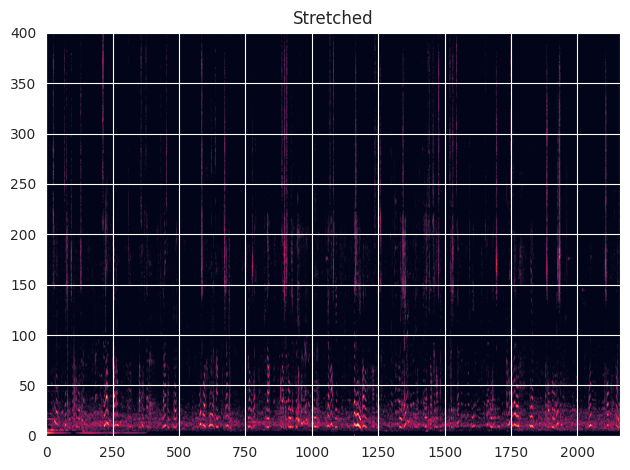

In [5]:


waveform, sample_rate = torchaudio.load(join(ROOT_DIR, "data", "dataset", "3_0.wav"), normalize=True)
transform = torchaudio.transforms.Spectrogram(n_fft=800)
spectrogram = transform(waveform)

print(spectrogram.size())

def plot():
    def plot_spec(ax, spec, title):
        ax.set_title(title)
        ax.imshow(librosa.amplitude_to_db(spec), origin="lower", aspect="auto")
    
    fig, axes = plt.subplots(1, 1, sharex=True, sharey=True)
    plot_spec(axes, torch.abs(spectrogram).view(401, -1), title="Stretched")
    # plot_spec(axes[1], torch.abs(spec[0]), title="Original")
    # plot_spec(axes[2], torch.abs(spec_09[0]), title="Stretched x0.9")
    fig.tight_layout()
plot()